# Mounts, installations and imports

In [ ]:
# Mount workspace
from google.colab import drive
drive.mount('/content/drive')
!unzip -o -u "/content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip" -d "."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip
  inflating: ./models/LLM/DistilBert.py  


In [ ]:
# installations
!pip uninstall -y transformers
!pip install git+https://github.com/huggingface/transformers
!pip install stormtrooper
!pip install datasets

Found existing installation: transformers 4.40.0.dev0
Uninstalling transformers-4.40.0.dev0:
  Successfully uninstalled transformers-4.40.0.dev0
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-c0l3dpq8
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-c0l3dpq8
  Resolved https://github.com/huggingface/transformers to commit b109257f4fb8b1166e7c53cc5418632014ed53a5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... canceledERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
# Imports
# external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# internal imports
from preprocessors import loaders
from utils import constants
from utils import utils
from visualization import visualization
from evaluators import evaluators
from models.LLM import DistilBert

# Amazon Dataset

## Load dataset

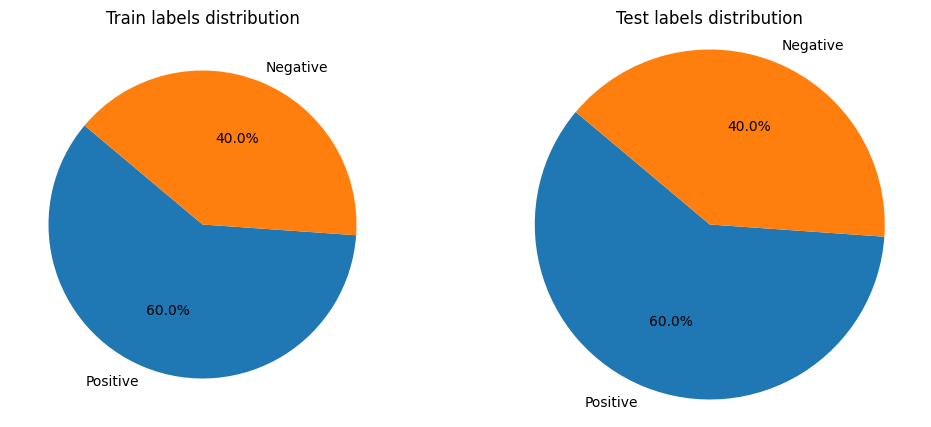

In [ ]:
amazon_train_df, amazon_test_df = loaders.load_raw_data(constants.DatasetAmazon, root_path="/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis")
visualization.plot_label_distribution(amazon_train_df, amazon_test_df)

## Model Initialization

In [ ]:
# model = DistilBert.ZeroShotClassifier(model="distilbert/distilbert-base-uncased",device=0)
from transformers import pipeline
model_name = "DistilBert_Yelp"
model = DistilBert.FineTunedClassifier(model_path="/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis/Data/Output/Models/DistilBert_Yelp",device=0, max_length=512)
# model = pipeline("zero-shot-classification", model="distilbert/distilbert-base-uncased", device=0, max_length=512, truncation=True, padding=True
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased", max_length=300, use_fast=True, max_len=300, model_max_length=512)
# model.classifier = pipeline("zero-shot-classification", model="distilbert/distilbert-base-uncased", device=0, max_length=300, truncation=True, padding=True)

## Model Evaluation

In [ ]:
dataset = constants.DatasetAmazon
max_rows = 11000
train_df, test_df = amazon_train_df[:max_rows], amazon_test_df[:max_rows]
run_id = "1"
batch_size = 1000
evaluators.batch_evaluate(model, model_name, train_df, test_df, batch_size, "/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis/Data/Output", dataset, run_id)


100%|██████████| 1000/1000 [00:06<00:00, 156.76it/s]


Time taken (in seconds) for predicting Train dataset: 6.419320


100%|██████████| 1000/1000 [00:06<00:00, 160.27it/s]


Time taken (in seconds) for predicting Test dataset: 6.281183
Completed batch#: 1, remaining: 10


100%|██████████| 1000/1000 [00:06<00:00, 156.83it/s]


Time taken (in seconds) for predicting Train dataset: 6.421951


100%|██████████| 1000/1000 [00:06<00:00, 155.08it/s]


Time taken (in seconds) for predicting Test dataset: 6.489806
Completed batch#: 2, remaining: 9


100%|██████████| 1000/1000 [00:06<00:00, 156.56it/s]


Time taken (in seconds) for predicting Train dataset: 6.432101


100%|██████████| 1000/1000 [00:06<00:00, 155.25it/s]


Time taken (in seconds) for predicting Test dataset: 6.490724
Completed batch#: 3, remaining: 8


100%|██████████| 1000/1000 [00:06<00:00, 152.47it/s]


Time taken (in seconds) for predicting Train dataset: 6.609781


100%|██████████| 1000/1000 [00:06<00:00, 154.60it/s]


Time taken (in seconds) for predicting Test dataset: 6.512779
Completed batch#: 4, remaining: 7


100%|██████████| 1000/1000 [00:06<00:00, 155.99it/s]


Time taken (in seconds) for predicting Train dataset: 6.454921


100%|██████████| 1000/1000 [00:06<00:00, 155.88it/s]


Time taken (in seconds) for predicting Test dataset: 6.457038
Completed batch#: 5, remaining: 6


 98%|█████████▊| 985/1000 [00:06<00:00, 156.10it/s]


Exception! 'float' object is not subscriptable
Completed batch#: 6, remaining: 5


100%|██████████| 1000/1000 [00:06<00:00, 150.88it/s]


Time taken (in seconds) for predicting Train dataset: 6.678039


100%|██████████| 1000/1000 [00:06<00:00, 156.99it/s]


Time taken (in seconds) for predicting Test dataset: 6.413100
Completed batch#: 7, remaining: 4


100%|██████████| 1000/1000 [00:06<00:00, 155.04it/s]


Time taken (in seconds) for predicting Train dataset: 6.500182


100%|██████████| 1000/1000 [00:06<00:00, 154.21it/s]


Time taken (in seconds) for predicting Test dataset: 6.539798
Completed batch#: 8, remaining: 3


100%|██████████| 1000/1000 [00:06<00:00, 155.17it/s]


Time taken (in seconds) for predicting Train dataset: 6.489496


100%|██████████| 1000/1000 [00:06<00:00, 148.33it/s]


Time taken (in seconds) for predicting Test dataset: 6.791894
Completed batch#: 9, remaining: 2


100%|██████████| 1000/1000 [00:06<00:00, 152.39it/s]


Time taken (in seconds) for predicting Train dataset: 6.607639


100%|██████████| 1000/1000 [00:06<00:00, 156.42it/s]


Time taken (in seconds) for predicting Test dataset: 6.441910
Completed batch#: 10, remaining: 1


 85%|████████▌ | 851/1000 [00:05<00:00, 150.59it/s]

Exception! 'float' object is not subscriptable
Completed batch#: 11, remaining: 0


# Yelp Dataset

## Load Dataset

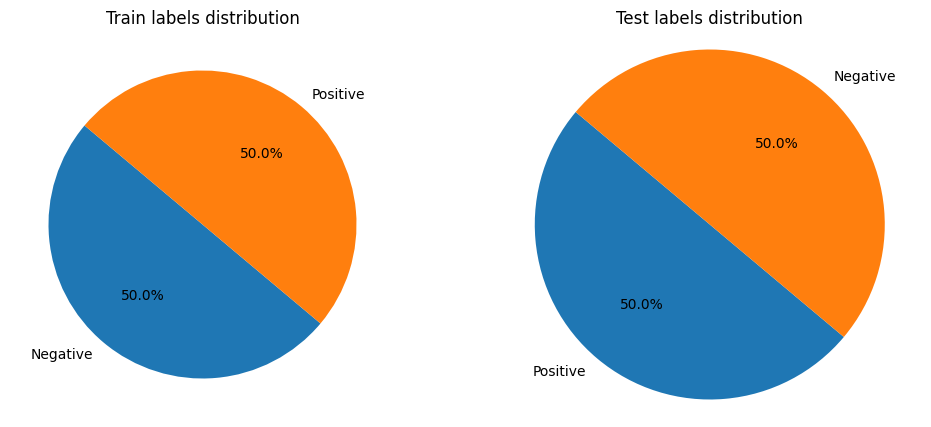

In [ ]:
yelp_train_df, yelp_test_df = loaders.load_raw_data(constants.DatasetYelp, root_path="/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis")
visualization.plot_label_distribution(yelp_train_df, yelp_test_df)

## Model Evaluation

In [ ]:
dataset = constants.DatasetYelp
max_rows = 11000
batch_size = 1000
train_df, test_df = yelp_train_df[:max_rows], yelp_test_df[:max_rows]
run_id = "1"
evaluators.batch_evaluate(model, model_name, train_df, test_df, batch_size, "/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis/Data/Output", dataset, run_id)


100%|██████████| 1000/1000 [00:06<00:00, 144.94it/s]


Time taken (in seconds) for predicting Train dataset: 6.944352


100%|██████████| 1000/1000 [00:06<00:00, 152.17it/s]


Time taken (in seconds) for predicting Test dataset: 6.622014
Completed batch#: 1, remaining: 10


100%|██████████| 1000/1000 [00:06<00:00, 153.53it/s]


Time taken (in seconds) for predicting Train dataset: 6.558524


100%|██████████| 1000/1000 [00:06<00:00, 155.43it/s]


Time taken (in seconds) for predicting Test dataset: 6.488225
Completed batch#: 2, remaining: 9


100%|██████████| 1000/1000 [00:06<00:00, 157.75it/s]


Time taken (in seconds) for predicting Train dataset: 6.381743


100%|██████████| 1000/1000 [00:06<00:00, 148.99it/s]


Time taken (in seconds) for predicting Test dataset: 6.771882
Completed batch#: 3, remaining: 8


100%|██████████| 1000/1000 [00:06<00:00, 153.57it/s]


Time taken (in seconds) for predicting Train dataset: 6.555882


100%|██████████| 1000/1000 [00:06<00:00, 155.46it/s]


Time taken (in seconds) for predicting Test dataset: 6.476446
Completed batch#: 4, remaining: 7


100%|██████████| 1000/1000 [00:06<00:00, 150.73it/s]


Time taken (in seconds) for predicting Train dataset: 6.681023


100%|██████████| 1000/1000 [00:06<00:00, 158.44it/s]


Time taken (in seconds) for predicting Test dataset: 6.352576
Completed batch#: 5, remaining: 6


100%|██████████| 1000/1000 [00:06<00:00, 153.76it/s]


Time taken (in seconds) for predicting Train dataset: 6.548863


100%|██████████| 1000/1000 [00:06<00:00, 151.23it/s]


Time taken (in seconds) for predicting Test dataset: 6.656104
Completed batch#: 6, remaining: 5


100%|██████████| 1000/1000 [00:06<00:00, 149.64it/s]


Time taken (in seconds) for predicting Train dataset: 6.737668


100%|██████████| 1000/1000 [00:06<00:00, 156.34it/s]


Time taken (in seconds) for predicting Test dataset: 6.440903
Completed batch#: 7, remaining: 4


100%|██████████| 1000/1000 [00:06<00:00, 152.82it/s]


Time taken (in seconds) for predicting Train dataset: 6.587633


100%|██████████| 1000/1000 [00:06<00:00, 149.64it/s]


Time taken (in seconds) for predicting Test dataset: 6.732898
Completed batch#: 8, remaining: 3


100%|██████████| 1000/1000 [00:06<00:00, 148.87it/s]


Time taken (in seconds) for predicting Train dataset: 6.776423


100%|██████████| 1000/1000 [00:06<00:00, 154.33it/s]


Time taken (in seconds) for predicting Test dataset: 6.523402
Completed batch#: 9, remaining: 2


100%|██████████| 1000/1000 [00:06<00:00, 159.42it/s]


Time taken (in seconds) for predicting Train dataset: 6.313266


100%|██████████| 1000/1000 [00:06<00:00, 151.22it/s]


Time taken (in seconds) for predicting Test dataset: 6.660631
Completed batch#: 10, remaining: 1


100%|██████████| 1000/1000 [00:06<00:00, 159.95it/s]


Time taken (in seconds) for predicting Train dataset: 6.293998


100%|██████████| 1000/1000 [00:06<00:00, 145.59it/s]

Time taken (in seconds) for predicting Test dataset: 6.914827
Completed batch#: 11, remaining: 0
